# Obesity Rates in Allegheny County Data

## Introduction
For this project, I analyzed the obesity rates in Allegheny County from 2006-2010. I ultimately concluded that the neighborhood with the lowest obesity estimate was the best neighborhood overall. The metric I created was obesity_rates to measure the obesity estimates over the course of 4 years.

In [11]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
#importing the data
data = pd.read_csv("obesity.csv.csv")
data.head(20)

,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
5,Pennsylvania,42003040400,40400,NaN,PITTSBURGH,Pittsburgh,North oakland,0.155867
6,Pennsylvania,42003040500,40500,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.112780
7,Pennsylvania,42003040600,40600,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.144556
8,Pennsylvania,42003040900,40900,NaN,PITTSBURGH,Pittsburgh,South Oakland,0.281331
9,Pennsylvania,42003050100,50100,NaN,PITTSBURGH,Pittsburgh,Middle Hill,0.608099


### Concerns with the data
This data was a bit tricky to work with for multiple reasons. Firstly, when I looked at the data set for the first time I initially thought that the data set was very small. The data set had 42 pages of points, with 10 estimates per page. So it was actually very large.  Another concern was the fact that certain neighborhoods were listed **more than once** so I had to be careful of any potential repeats. Lastly, some of the neighborhoods that were used in the study were not in Allegheny County, so I had to be acreful in my analysis to make sure those were not included in my conclusion. In order to look at the data better, I decided to plot the first 20 neighborhoods and their obesity estimates in a bar graph

Text(0, 0.5, 'Estimates')

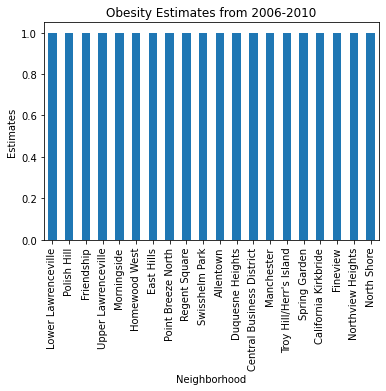

In [12]:
#making a bar graph
estimates = data['City Neighborhood'].value_counts()
estimates.tail(20).plot(kind='bar')
plt.title("Obesity Estimates from 2006-2010")
plt.xlabel("Neighborhood")
plt.ylabel("Estimates")

This bar graph is **very hard to read**. The estimates are measured to 9 decimal places, making each and every data point very close to each other. Because of this, they are actually too close to clearly and distinctly look at and analyze. Instead of this, I am going to make two lists. This first one will be listing the 10 neighborhoods with the lowest obesity estimates. The second list will be the 10 neighborhoods with the highest obesity estimates. I ultimately need both lists because of the repeats of neighborhoods in the data set.

In [21]:
#list with the lower estimates
endData=data.groupby("City Neighborhood").sum()['2006-2010 estimate of obesity']
endData.sort_values(ascending=True).head(20)

City Neighborhood
North Shore         0.121487
North oakland       0.155867
Regent Square       0.160133
Allegheny West      0.206399
North Oakland       0.209158
Friendship          0.220126
Banksville          0.239786
Bluff               0.246936
Duquesne Heights    0.248010
Swisshelm Park      0.249422
Central Oakland     0.257337
Westwood            0.268106
Oakwood             0.268579
Morningside         0.275902
Ridgemont           0.276786
South Oakland       0.281331
West End            0.287904
Bon Air             0.289505
Summer Hill         0.302258
Hays                0.306539
Name: 2006-2010 estimate of obesity, dtype: float64

In [22]:
#list with the higher estimates
endData.sort_values(ascending=False).head(20)

City Neighborhood
Lincoln-Lemington-Belmar    1.736707
Garfield                    1.575352
Terrace Village             1.348206
Homewood South              1.219393
Homewood North              1.192850
Bloomfield                  1.161758
Brookline                   1.120669
Mount Washington            1.072654
Larimer                     1.035119
Marshall-Shadeland          0.960206
Northview Heights           0.922932
Carrick                     0.915074
Perry South                 0.906849
Brighton Heights            0.885729
Central Northside           0.884262
East Liberty                0.859988
Fairywood                   0.820311
Hazelwood                   0.771700
California Kirkbride        0.771046
Saint Clair                 0.699500
Name: 2006-2010 estimate of obesity, dtype: float64

## Conclusion
Based on the data, more specifically the lists, 